Estimated θ (theta): 1.6447
Lift after CUPED: 4.85%
95% Confidence Interval for lift: ±11.6615


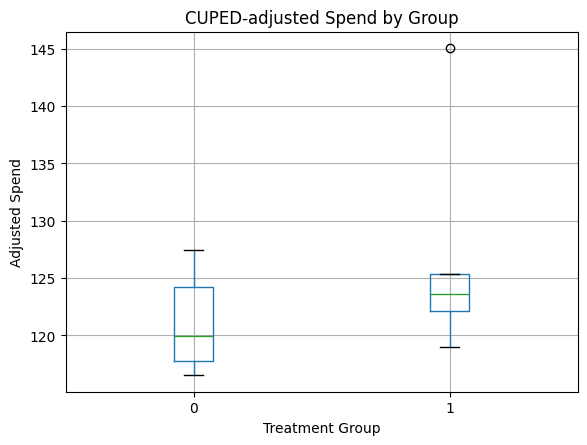

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_ind, t

# Load dataset
df = pd.read_csv("pre_post_events.csv")

# Sanity checks
df["pre_spend"] = pd.to_numeric(df["pre_spend"], errors='coerce')
df["post_spend"] = pd.to_numeric(df["post_spend"], errors='coerce')
df["treatment"] = pd.to_numeric(df["treatment"], errors='coerce')
assert not df[["pre_spend", "post_spend", "treatment"]].isnull().any().any(), "Missing values!"

# Estimate theta using OLS
X = df["pre_spend"]
y = df["post_spend"]
X_const = sm.add_constant(X)
theta_model = sm.OLS(y, X_const).fit()
theta = theta_model.params["pre_spend"]

# Apply CUPED adjustment
mean_pre = df["pre_spend"].mean()
df["cuped_post_spend"] = df["post_spend"] - theta * (df["pre_spend"] - mean_pre)

# Compute lift
treatment = df[df["treatment"] == 1]["cuped_post_spend"]
control = df[df["treatment"] == 0]["cuped_post_spend"]
lift = (treatment.mean() - control.mean()) / control.mean() * 100

# Confidence Interval (95%)
stderr = np.sqrt(treatment.var()/len(treatment) + control.var()/len(control))
ci_95 = t.ppf(0.975, df=len(treatment)+len(control)-2) * stderr

# Print results
print(f"Estimated θ (theta): {theta:.4f}")
print(f"Lift after CUPED: {lift:.2f}%")
print(f"95% Confidence Interval for lift: ±{ci_95:.4f}")

import matplotlib.pyplot as plt

df.boxplot(column="cuped_post_spend", by="treatment")
plt.title("CUPED-adjusted Spend by Group")
plt.suptitle("")
plt.xlabel("Treatment Group")
plt.ylabel("Adjusted Spend")
plt.show()
